## Imports

In [73]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from pandas import DataFrame
import pickle
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#XGB
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# RF
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Over-sampling for imbalance problem
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

%config InlineBackend.figure_format = 'svg'

## Pre-process data

In [81]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
raw_data=pd.read_csv('Data_All_sorted_alpha_MVP_V8.csv')

#raw_data.index = raw_data.Neighbourhood

Y = pd.DataFrame(raw_data['Future_low_income_pop_per'])
Y=np.log(Y)
# Features selections

# options -: All fesstures:
X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
                         'Low income population percentage','Total Area','Total Population',\
                         'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                         'Social Housing Units','Rent Bank Applicants']])

# options -2: High correlation features
# X = pd.DataFrame(raw_data[['Change in housing pricing',\
#                          'Low income population percentage','Total Area',\
#                          'Recent Immigrants',\
#                          'Social Housing Units']])

# ,'Rent Bank Applicants'

# options -3: Highest correlation features
# X = pd.DataFrame(raw_data[['Change in low income pop',\
#                            'Pop  25 - 34 years','Businesses',\
#                            'Social Housing Units']])

# Resampling for imbalance
#X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
#print(sorted(Counter(y_resampled).items()))

#Split Test Train Data
    #if original data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

    #if resampled data:
#X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 44)


# #Method -2 : Stratified
# split = StratifiedShuffleSplit(n_splits=1, test_size=.15, random_state=44) # split is to classify for stratify
# for train_index, test_index in split.split(raw_data, raw_data[['Label']]):  # column to use to stratify
#     X_train = X.loc[train_index]
#     X_test = X.loc[test_index]
#     Y_train = Y.loc[train_index]
#     Y_test = Y.loc[test_index]

#Standardize the Data:
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


## Modeling

In [82]:
# #############################################################################
# Fit regression model

# fit model no training data
model = XGBRegressor()
eval_set = [(X_test, Y_test)]
model_XGB=model.fit(X_train, Y_train, eval_set=eval_set, early_stopping_rounds=1)

model_XGB=clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, model_XGB.predict(X_test))
print("MSE: %.4f" % mse)

# save the model to disk
predictive_Reg_model_XGB = 'finalized_Reg_model_XGB.sav'
pickle.dump(model_XGB, open(predictive_Reg_model_XGB, 'wb'))

[10:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.33771
Will train until validation_0-rmse hasn't improved in 1 rounds.
[1]	validation_0-rmse:2.12609
[2]	validation_0-rmse:1.93427
[3]	validation_0-rmse:1.76065
[4]	validation_0-rmse:1.60564
[5]	validation_0-rmse:1.46351
[6]	validation_0-rmse:1.33604
[7]	validation_0-rmse:1.2227
[8]	validation_0-rmse:1.12109
[9]	validation_0-rmse:1.02443
[10]	validation_0-rmse:0.94201
[11]	validation_0-rmse:0.874173
[12]	validation_0-rmse:0.80448
[13]	validation_0-rmse:0.743109
[14]	validation_0-rmse:0.686312
[15]	validation_0-rmse:0.641178
[16]	validation_0-rmse:0.598593
[17]	validation_0-rmse:0.555764
[18]	validation_0-rmse:0.516231
[19]	validation_0-rmse:0.48359
[20]	validation_0-rmse:0.453458
[21]	validation_0-rmse:0.42534
[22]	validation_0-rmse:0.403014
[23]	validation_0-rmse:0.382758
[24]	validation_0-rmse:0.365891
[25]	validation_0-rmse:0.349976
[26]	validati

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.0360


## Predictions

In [83]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# load the model from disk
loaded_model = pickle.load(open('finalized_Reg_model_XGB.sav', 'rb'))
y_pred_RF= loaded_model.predict(X_test)

y_pred_RF= loaded_model.predict(X_test)
y_pred_train_RF=loaded_model.predict(X_train)

Error = np.abs(Y_test.values - y_pred_RF)#/np.abs(Y_test)
print("Error : in "+str(np.mean(Error)))

rms_RFR = np.sqrt(mean_squared_error(Y_test, y_pred_RF))
print("RMS ="+str(rms_RFR))

rr_TRAIN = metrics.r2_score(Y_train, y_pred_train_RF)
rr_TRAIN = round(rr_TRAIN,2)
print("R-Squared-TRAIN ="+str(rr_TRAIN))

rr_TEST = metrics.r2_score(Y_test, y_pred_RF)
rr_TEST = round(rr_TEST,2)
print("R-Squared-TEST ="+str(rr_TEST))

Error : in 0.42372808782082816
RMS =0.1897222694178794
R-Squared-TRAIN =0.97
R-Squared-TEST =0.79


## Visualisation

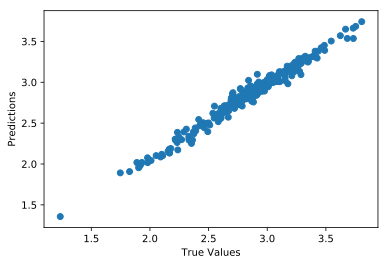

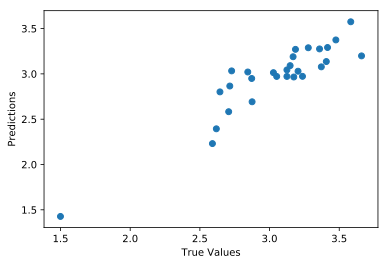

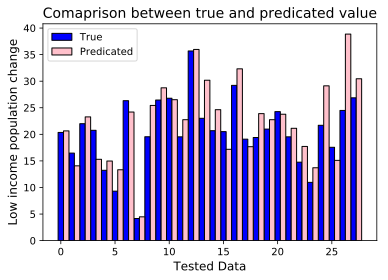

In [84]:
## The line / model
plt.scatter(Y_train, y_pred_train_RF)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')
plt.show()

plt.scatter(Y_test, y_pred_RF)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')
plt.show()

y_pred_RF_4plt = pd.DataFrame(np.exp(y_pred_RF))
y_pred_RF_4plt.columns = ['Future_low_income_pop_per']

y_test_4plt = pd.DataFrame(np.exp(Y_test))
#df['Future_change_low_income_pop'] = pd.DataFrame(y_pred_lm)
y_test_4plt.columns = ['Future_low_income_pop_per']


Coparison=['True','Predicated']
pos = np.arange(len(y_test_4plt))
bar_width = 0.5
PredictoinValues=y_pred_RF_4plt['Future_low_income_pop_per'] #[60,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,100,100]
TestValues=y_test_4plt['Future_low_income_pop_per'] #[30,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,20,33]


plt.bar(pos,PredictoinValues,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,TestValues,bar_width,color='pink',edgecolor='black')
plt.xlabel('Tested Data', fontsize=12)
plt.ylabel('Low income population change', fontsize=12)
plt.title('Comaprison between true and predicated value',fontsize=14)
plt.legend(Coparison,loc=2)
plt.show()


## Plot Train and Test Data Together

Text(0.5, 1.0, 'Predicted Vs. Actual')

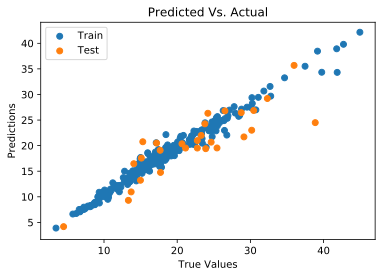

In [85]:
color = ("blue", "yellow")
plt.scatter(np.exp(Y_train), np.exp(y_pred_train_RF), label="Train")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')

plt.scatter(np.exp(Y_test), np.exp(y_pred_RF), label="Test")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')
plt.legend(loc=2)
plt.title('Predicted Vs. Actual')

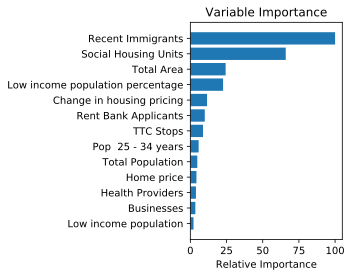

In [86]:
# Plot feature importance
feature_importance = model_XGB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()